# Multiple Linear Regression with Assumptions

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
california=fetch_california_housing()
california


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [4]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
## Target to predict
print(california.target_names)

['MedHouseVal']


In [7]:
print(california.data) ## Independent features
california.data.shape

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


(20640, 8)

In [8]:
print(california.target) ## Dependent feature
print(california.target.shape)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
(20640,)


In [9]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Creating a Dataframe

In [10]:
dataset=pd.DataFrame(california.data, columns=california.feature_names)

In [11]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [13]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [14]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


<Axes: >

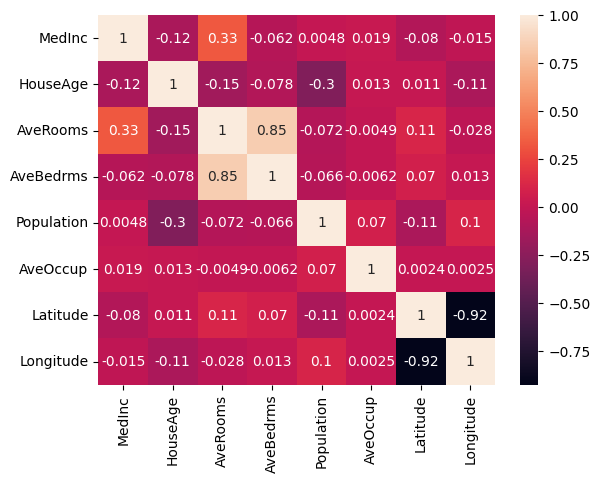

In [15]:
import seaborn as sns
# sns.pairplot(dataset)
sns.heatmap(dataset.corr(), annot=True)

In [16]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [17]:
## Independent and Dependent features
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
X = dataset
y = california.target



In [19]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

In [23]:
## Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model Training

In [25]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [26]:
regression

LinearRegression()

In [27]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
## All Slopes

regression.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [ ]:
## Intercept.

regression.intercept_

np.float64(2.0634768086491184)

In [32]:
## Prediction for the test data.
y_pred = regression.predict(X_test)

In [33]:
## Performance Metrices

from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))

mse, mae, rmse

(0.552233239936362, 0.5371056943007961, np.float64(0.743123973463622))

In [35]:
## R square and adjusted R square.

from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print(score)

adj_r_sqr=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r_sqr)

0.5935958526436639
0.5931179409607519


## Assumptions

Text(0, 0.5, 'Test Predicted data')

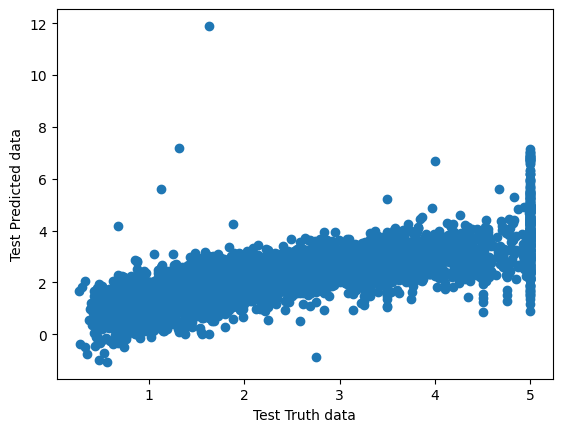

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test Truth data')
plt.ylabel('Test Predicted data')

In [37]:
## Residuals

residuals=y_test-y_pred
residuals

array([-1.32997485,  0.96088514, -0.7469077 , ..., -1.36603708,
        0.04647993, -0.62777012], shape=(6812,))

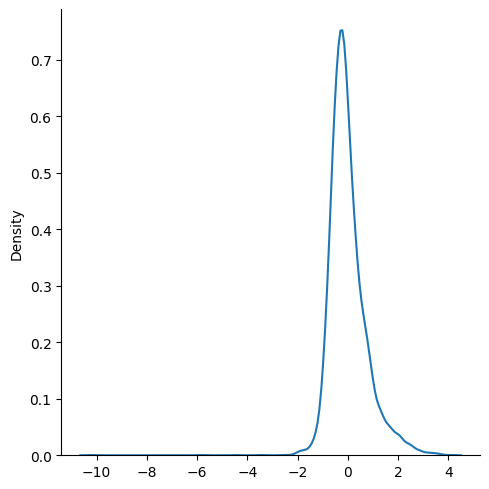

In [38]:
sns.displot(residuals, kind='kde')

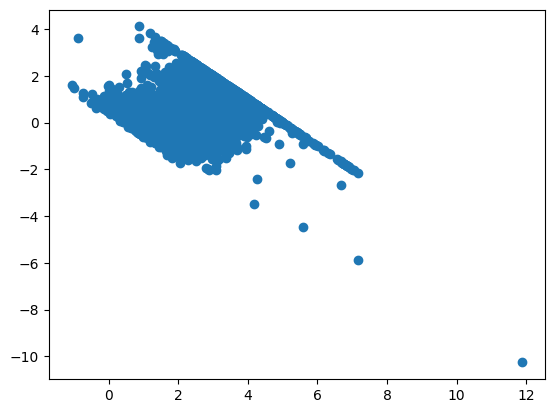

In [40]:
## Scatter plot with predictions and residuals
# ! Uniform distribution

plt.scatter(y_pred, residuals) ## ! Because scatter points are not uniformly distributed thus model is not that good.

## Pickling a model

Python pickle module is used for serialising and deserializing a python object structure
any object in python can be pickled so that it can be saved on disc
what pickle does is that it serialises the object first before writing it to file.
pickling is a way to convert a python object into a character stream.
The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [41]:
import pickle
pickle.dump(regression, open('regressor.pkl', 'wb'))

In [42]:
## Now how to load.
model=pickle.load(open('regressor.pkl', 'rb'))

In [44]:
## Now we can do predictions with our model.

model.predict(X_test)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012], shape=(6812,))